<center><h1><strong>Diseño de una Montaña Rusa</strong></h1></center>  
<center><img src="Montaña Rusa.jpg" width=450 height=270></center>  

### **Sección: 305C1**
### **Estudiantes:**
Manuel Nava 30.822.007  
Juan Wu 30.391.117  
Enrique Gonzalez 31.456.812

<p align="left">Una empresa de parques de atracciones está diseñando una nueva montaña 
rusa y necesita que la trayectoria de la vía sea suave y continúe en todo el recorrido. 
Para esto, solicitan que se realice un modelo matemático que utilice un método de 
trazador cúbico sujeto. Además, requieren que el análisis de la estabilidad 
estructural de la vía se haga utilizando un polinomio de mínimos cuadrados para 
ajustar los datos experimentales obtenidos de las pruebas de tensión y compresión 
del material. El diseño también debe incluir el uso de polinomios ortogonales para 
optimizar la forma de ciertos tramos de la vía y mejorar la experiencia del usuario. 
Finalmente, se necesita resolver un sistema de ecuaciones para determinar las 
fuerzas que actúan en los puntos críticos de la estructura.
</p>


obtenemos los datos


In [28]:

import numpy as np

import csv

def obtenerelarreglodefilas(archivo, filadelarchivo):
    with open(archivo, 'r') as file:
        leo = csv.reader(file)
        filas = list(leo)
        if filadelarchivo > len(filas) or filadelarchivo < 1:
            raise ValueError("fila fuera del rango")
        return filas[filadelarchivo - 1]
    
archivo = 'datos.csv'
filadelarchivo = 1
xi = obtenerelarreglodefilas(archivo, filadelarchivo)
xi = [float(cadena) for cadena in xi]
print("Paso 1:")
print("x_data: ")
print(xi)

def obtengoyi():
    archivo = 'datos.csv'
    filadelarchivo = 2
    yi = obtenerelarreglodefilas(archivo, filadelarchivo)
    yi = [float(cadena) for cadena in yi]
    return yi
print("y_data: ")
yi = obtengoyi()
print(yi)
print()

def obtengoxiparapaso2():
    archivo = 'datos.csv'
    filadelarchivo = 3
    xi = obtenerelarreglodefilas(archivo, filadelarchivo)
    xi = [float(cadena) for cadena in xi]
    return xi

def obtengoyiparapaso2():
    archivo = 'datos.csv'
    filadelarchivo = 4
    yi = obtenerelarreglodefilas(archivo, filadelarchivo)
    yi = [float(cadena) for cadena in yi]
    return yi

print()
print("Paso 2: ")
xi2 = obtengoxiparapaso2()
yi2 = obtengoyiparapaso2()
print("x_data:")
print(xi2)
print("y_data:")
print(yi2)
print()

#Datos del tercer paso
xi3=xi
yi3=yi

def obtengoyiparapaso4():
    archivo = 'datos.csv'
    filadelarchivo = 6
    yi4 = obtenerelarreglodefilas(archivo, filadelarchivo)
    yi4 = [float(cadena) for cadena in yi4]
    return yi4

def obtengoxiparapaso4():
    archivo = 'datos.csv'
    filadelarchivo = 5
    xi4 = obtenerelarreglodefilas(archivo, filadelarchivo)
    xi4 = [float(cadena) for cadena in xi4]
    return xi4

def obtener_npa ():
    archivo = 'datos.csv'
    filadelarchivo = 5
    na = obtenerelarreglodefilas(archivo, filadelarchivo)
    xxx = np.zeros((3,3), dtype=np.float64)
    for i in range (3):
        for j in range(3):
            xxx[i][j] = na[i*3+j]
    return xxx
naa = obtener_npa()
variable_naa=naa
print("Paso 3: ")
print("x_data: ")

def obtener_npb():
    archivo = 'datos.csv'
    filadelarchivo = 6
    nb = obtenerelarreglodefilas(archivo, filadelarchivo)
    bbb = np.zeros((3,1),dtype=np.float64)
    i = 0
    for i in range (3):
        bbb[i] = nb[i]
    return bbb

xi4 = obtener_npa()
yi4 = obtener_npb()
print(xi4)
print("y_data: ")
print(yi4)

Paso 1:
x_data: 
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
y_data: 
[0.5, 0.8, 1.0, 0.9, 1.2, 0.7]


Paso 2: 
x_data:
[0.0, 1.0, 2.0, 3.0, 4.0]
y_data:
[1.1, 3.5, 2.8, 4.2, 5.0]

Paso 3: 
x_data: 
[[ 1.  2.  1.]
 [ 2. -1.  1.]
 [ 3.  1. -1.]]
y_data: 
[[ 4.]
 [ 1.]
 [-2.]]



Paso 1: Trazado cubico sujeto 

El trazador cúbico sujeto es una técnica de interpolación que se utiliza para aproximar una función a partir de un conjunto de puntos de control. A diferencia del trazador cúbico natural, el trazador cúbico sujeto incorpora condiciones adicionales en los extremos del intervalo.

$ S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3 $


Text(0.5, 1.0, 'Trazador cúbico sujeto')

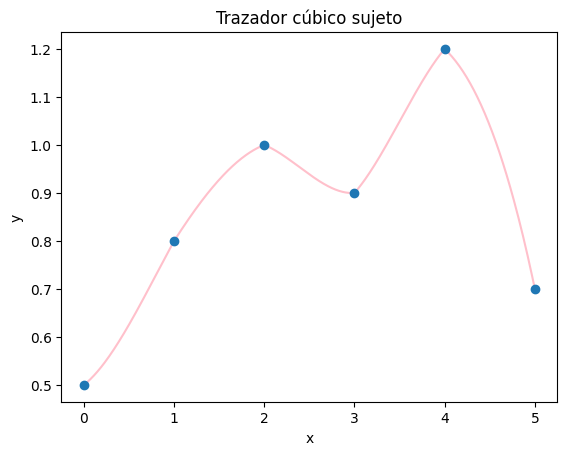

In [29]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


def trazadocubicosujeto(xi, yi):
    n = len(xi)
    h = np.zeros(n-1, dtype = float)  #h para calcular las diferencias entre los valores consecutivos de x
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]  #las diferencias se guardan en el arreglo h 
    
    #sistema de ecuaciones
    A = np.zeros(shape=(n,n), dtype = float)  #array de a que representara los coeficientees de las ecuaciones
    B = np.zeros(n, dtype = float)      #el lado derecho de la ecuacion
    S = np.zeros(n, dtype = float)      #la matrifz que almacerana la soluciones del sistema de ecauciones

    A[0,0] = 2*h[0]
    A[0,1] = h[0] 
    B[0] = 3*((yi[1]-yi[0])/h[0])      #llenado de la matriz de a y de b para resolverlas proximamente en un sistema de ecauciones

    for i in range(1,n-1,1):
        A[i,i-1] = h[i-1]
        A[i,i] = 2*(h[i-1]+h[i])
        A[i,i+1] = h[i]
        factor21 = (yi[i+1]-yi[i])/h[i]
        factor10 = (yi[i]-yi[i-1])/h[i-1]  #los factores representan las pendientes de la funcion cubica en los puntos de control i y i+1
        B[i] = 3*(factor21 - factor10)    #entonces lo mutiplicamos ppr 3 poer la parte de la formula de la funcion cubica 3ax^2
        
    A[n-1,n-2] = h[n-2]
    A[n-1,n-1] = 2*h[n-2]
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-1] = 3*(factor12 - factor23)
    

    r = np.linalg.solve(A,B)       #resolvemos el sistema de ecuaciones y lo almacenamos todo en S
    for j in range(0,n,1):
        S[j] = r[j]
    
    #creamos arreglos donde utilizando la solucion del sistema y las diferencia de valores entre x y y 
    #calculamos con eso entonces los coeficeintes de la spline cubica 
    a = np.zeros(n-1, dtype = float); b = np.zeros(n-1, dtype = float) ; c = np.zeros(n-1, dtype = float) ; d = np.zeros(n-1, dtype = float)
    
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]    

    #aqui creamos una lista de polinomios utilizando los coeficientes que calculamos arriba
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):
        #aqui con los coeficientes los utilizamos para generar una parte del tramo del trazado cubico y luego se la paasamos al arreglo pxtabla
        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand() #simplificamos la expresion con expand y bello
        px_tabla.append(pxtramo)
    
    return(px_tabla)


muestras = 100

n = len(xi)
px_tabla = trazadocubicosujeto(xi,yi) #sacamos los tramos 


#creamos dos arreglos para que todos los tramos queden en una sola linea unida
xjunto = np.array([])
yjunto = np.array([])

for tramo in range(0, n-1, 1):
    xparagraficar = np.linspace(xi[tramo], xi[tramo+1], muestras)  #aqui la grafica nos da en tramos por ende tomamos los array y los unimos toodas para graficar todo en una linea suave
    yparagraficar = [px_tabla[tramo].subs('x', x) for x in xparagraficar] #evaluamos en el punto x con subs
    xjunto = np.concatenate((xjunto, xparagraficar))  #unimos o concatenamos los arrays
    yjunto = np.concatenate((yjunto, yparagraficar))

plt.plot(xjunto, yjunto, label='Trazador cúbico sujeto', color = "pink")
plt.plot(xi, yi, 'o', label='Puntos de control')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trazador cúbico sujeto')


paso 2: Polinomio de minimos cuadradps

El método de mínimos cuadrados es una técnica utilizada para ajustar un polinomio a un conjunto de datos experimentales. Su objetivo es encontrar los coeficientes del polinomio de tal manera que la suma de los cuadrados de las diferencias entre los valores predichos por el polinomio y los valores reales sea mínima.

$ P(x) = c_0 + c_1x^2 + c_2x^2 + ... + c_nx^n $

teniendo en cuenta el error de 

$$  E = \sum_{i=0}^{m} (y_i - P(x_i))^2  $$

Text(0.5, 1.0, 'polinomio minimos cuadrados')

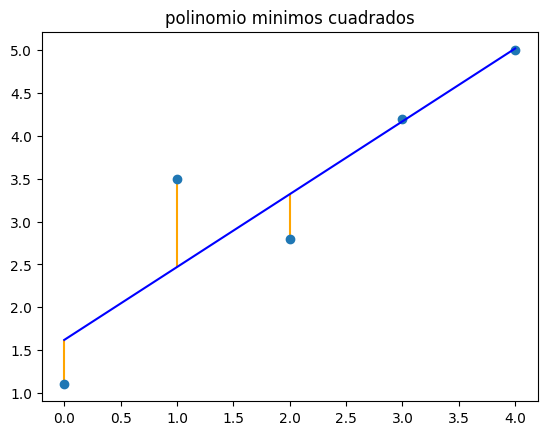

In [21]:
#metodo 2
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
lista1 = np.array(xi2)
lista2 = np.array(yi2)      #hacemos dos arreglos del tama;o del array de los 2do datos 
terminos = len(xi2)

promediolista1 = np.mean(xi2)  #hacemos la tabla para generar el polinomio
promediolista2 = np.mean(yi2)
Ex = np.sum(lista1)
Ey = np.sum(lista2)
Exy = np.sum(lista1*lista2)
Ex2 = np.sum(lista1**2)
Ey2 = np.sum(lista2**2)

coeficienteA1 = (terminos*Exy-Ex*Ey)/(terminos*Ex2-Ex**2)
coeficienteA0 = promediolista2 - coeficienteA1*promediolista1

x = sym.Symbol('x')
polinomio = coeficienteA0 + coeficienteA1 *x
fx = sym.lambdify(x,polinomio)   #hacemos la funcion 

valoresdexparagraficar = np.linspace(np.min(xi2), np.max(xi2), 100)
valoresdeyparagraifcar = fx(valoresdexparagraficar)

for i in range(0, terminos-1,1):
    y0 = np.min([yi2[i],fx(xi2[i])])
    y1 = np.max([yi2[i],fx(xi2[i])])
    plt.vlines(xi2[i],y0,y1, color = 'orange')

plt.plot(xi2,yi2, 'o', label = '(xi,yi)')
plt.plot(valoresdexparagraficar, valoresdeyparagraifcar, color = "blue", label = polinomio)
plt.title("polinomio minimos cuadrados")




## Paso 3: Polinomios Ortogonales

Los polinomios ortogonales son una familia de polinomios donde cada par de polinomios dentro de la familia es ortogonal respecto a un cierto peso dado en un intervalo específico.
Son importantes en análisis numérico y física teórica debido a sus propiedades de convergencia y estabilidad en métodos de aproximación y solución de ecuaciones diferenciales.

El polinomio de Chebyshev es una familia de polinomios ortogonales que tienen propiedades especiales debido a su relación con los cosenos de ángulos múltiplos. Estos polinomios, denotados como 
Tn(x), estan definidos en el intervalo [-1,1].

El cálculo de las raíces del polinomio de Chebyshev se puede realizar analíticamente utilizando las propiedades de estos polinomios. Para los polinomios de Chebyshev de primer tipo 
Tn(x), las raíces están dadas por:

xk = cos((2k+1)π)/2n para k = 1,2,3...,n-1

dichas raices del polinomio se utilizan para encontrar y ajustar el polinomio de Chebyshev con la funcion basada en los datos originales para optimizar la forma de las vias de la montaña Rusa.

Información del ajuste con polinomio de Chebyshev:
Grado del polinomio ajustado: 5
Coeficientes del polinomio ajustado: [-0.02083333  0.20104167 -0.64947917  0.92248698  0.35758464]


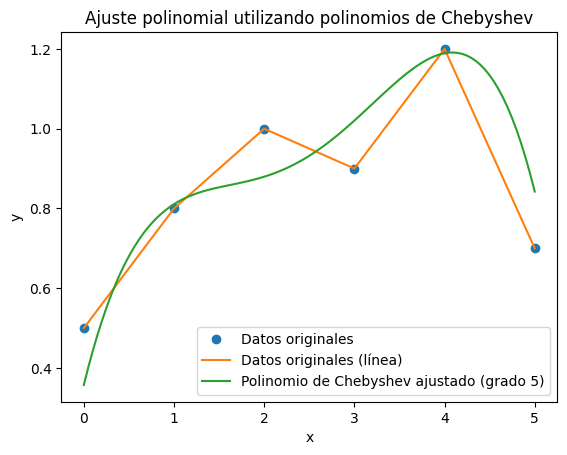

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Función de Chebyshev que retorna las raíces del polinomio segun su grado
def raices_chebyshev(grado):
    return np.cos((2 * np.arange(grado + 1) + 1) * np.pi / (2 * (grado + 1)))

# Función que ajusta un polinomio de Chebyshev a los datos
def Polinomio_chebyshev(grado, x, y):
    # Calcular las raíces del polinomio de Chebyshev de grado n
    raices = raices_chebyshev(grado)
    
    # Escalar las raíces al intervalo de los datos originales
    raices_escaladas = 0.5 * (raices + 1) * (x.max() - x.min())
    
    # Funcion basada en los datos originales
    funcion_original = np.poly1d(np.polyfit(x, y, deg=len(x) - 1))
    
    # Evaluar las raíces escaladas en la función de los datos originales
    yi = funcion_original(raices_escaladas)
    
    # Polinomio el polinomio usando las raíces escaladas y los valores evaluados
    polinomio = np.polyfit(raices_escaladas, yi, grado - 1)
    
    return np.poly1d(polinomio)

# Datos originales

x = np.array(xi3)
y = np.array(yi3)

# Datos a graficar
x_data = np.linspace(0, 5, 100)

# Establecemos el grado del polinomio
grado = 5

# Ajustar el polinomio de Chebyshev a los datos
polinomio_chebyshev = Polinomio_chebyshev(grado, x, y)

#Imprimir el grdo y los coeficientes del polinomio de chebyshev
print("Información del ajuste con polinomio de Chebyshev:")
print(f"Grado del polinomio ajustado: {grado}")
print(f"Coeficientes del polinomio ajustado: {polinomio_chebyshev.coefficients}")

# Graficar los datos originales y el polinomio ajustado
plt.plot(x, y, 'o', label='Datos originales')
plt.plot(x, y, '-', label='Datos originales (línea)')
plt.plot(x_data, polinomio_chebyshev(x_data), '-', label=f'Polinomio de Chebyshev ajustado (grado {grado})')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste polinomial utilizando polinomios de Chebyshev')
plt.show()

## Paso 4: Resolución de Ecuaciones

In [23]:
def gauss_jordan (ma,mb,x):
    
    #Aqui es para concantenar, una matriz y con el resultado correspondiente
    mab = np.concatenate((ma,mb),axis=1)

    # Pivoteo parcial por filas
    size = np.shape(mab) #En este "shape, es para separar de forma tupla, para obtener el tamaño de matriz concantenada"
    n = size[0]
    # Imprimir el sistema de ecuaciones
    print("Sistema de ecuaciones:")
    for i in range(n):
        row = ["{:3.2f}x{}".format(mab[i, j], j+1) for j in range(n)]
        print(" + ".join(row), "=", round(mab[i, n],2))
    print("---------------------------------")

    # Para cada fila en la matriz "mab" y intercambiamos la fila por el caso que el numero que se encuentra fuera de diagonal
    for i in range(0,n-1,1):
        # columna desde diagonal i en adelante
        columna = abs(mab[i:,i])
        NumMayor = np.argmax(columna)
    
    if (NumMayor!=0):
        temp = np.copy(mab[i,:])
        mab[i,:] = mab[NumMayor+i,:]
        mab[NumMayor+i,:] = temp  
    
    #Ahora ya se puede calcular el valor de x:
    for i in range(n):
        for j in range(n):
            if i != j:
                pp = mab[j][i]/mab[i][i]

                for k in range(n+1):
                    mab[j][k] = mab[j][k] - pp * mab[i][k]

    #Obtener la solucion:
    for i in range(n):
        x[i] = mab[i][n]/mab[i][i]




    print("La solucion del sistema de ecuaciones por Gauss Jordan es: ")
    for i in range(n):
        print("x[{:1d}] = {:3.2f}".format(i,x[i]))
    

#Creacion de un vector para conseguir
x = np.zeros((3))

gauss_jordan(xi4,yi4,x)

Sistema de ecuaciones:
1.00x1 + 2.00x2 + 1.00x3 = 4.0
2.00x1 + -1.00x2 + 1.00x3 = 1.0
3.00x1 + 1.00x2 + -1.00x3 = -2.0
---------------------------------
La solucion del sistema de ecuaciones por Gauss Jordan es: 
x[0] = -0.20
x[1] = 0.93
x[2] = 2.33
